# Idea: 

Citi Bike riders in Brooklyn are younger than riders in Manhattan

# Hypotheses:

* **Null hypothesis**: The average age of subscribers who start rides in Brooklyn stations is greater or the same as subscribers who start rides in Manhattan stations
* **Alternative hypothesis**: The average of subscribers who start rides in Brooklyn stations is lower than that of subscribers who start rides in Manhattan stations

# Work flow

In [1]:
import pylab as pl
import pandas as pd
import geopandas as gp
import numpy as np

import sys
import scipy.stats

import requests
from shapely.geometry import Point, MultiPolygon

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## I. Loading and processing stations data

In [3]:
# Creating csv of station data from Citi Bike
# stations.to_csv('data/stations.csv')

## II. Categorise stations by Borough

The csv of station coordinates was then used to join each station id (sid)
with the borough it falls within and resaved as **stations.csv** with the joined **'boro'** field in **ArchGIS**

Here is the alternative pythonic solution

In [4]:
stations['geometry'] = stations.apply(lambda z: Point(z.longitude, z.latitude), axis=1)
stations = gp.GeoDataFrame(stations)

In [5]:
boroughs = gp.read_file("/Users/casy/Dropbox/CUSP/1_1_PUI/PUI_Bycicle_Research/data/nybb_15c/borrows15_2.geojson")
boroughs

,BoroCode,BoroName,Shape_Area,Shape_Leng,geometry,id
0,5,Staten Island,1.623827e+09,330457.564664,(POLYGON ((-74.04149346307953 40.5706893260104...,0
1,3,Brooklyn,1.937597e+09,741185.900232,(POLYGON ((-73.85803149795356 40.5863413312228...,1
2,1,Manhattan,6.364467e+08,358408.460730,(POLYGON ((-74.00189504174071 40.6887586210318...,2
3,2,Bronx,1.186973e+09,464400.193625,(POLYGON ((-73.88775209444856 40.8000693909507...,3
4,4,Queens,3.045166e+09,897062.818305,(POLYGON ((-73.82764882165355 40.5991979944789...,4


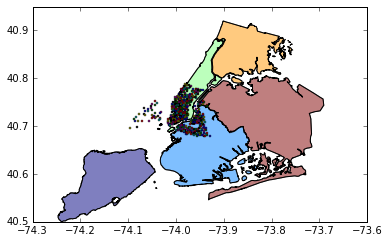

In [6]:
boroughs.plot();
stations.plot();

#### Categorise stations by borough

In [9]:
def BoroIntersect(boro):
    global stations
#     print boro.BoroCode
    bName = boro.BoroName
    p = MultiPolygon(boro.geometry)

    stations[bName] = stations.intersects(p)

boroughs.apply(lambda b: BoroIntersect(b),1)        
stations.head(3)
    

,altitude,availableBikes,availableDocks,city,id,landMark,lastCommunicationTime,latitude,location,longitude,...,statusKey,statusValue,testStation,totalDocks,geometry,Staten Island,Brooklyn,Manhattan,Bronx,Queens
0,,6,33,,72,,2015-10-04 04:43:22 PM,40.767272,,-73.993929,...,1,In Service,False,39,POINT (-73.99392888 40.76727216),False,False,False,False,False
1,,26,6,,79,,2015-10-04 04:42:26 PM,40.719116,,-74.006667,...,1,In Service,False,33,POINT (-74.00666661 40.71911552),False,False,True,False,False
2,,16,11,,82,,2015-10-04 04:42:26 PM,40.711174,,-74.000165,...,1,In Service,False,27,POINT (-74.00016545 40.71117416),False,False,True,False,False


In [26]:
stations.columns

Index([             u'altitude',        u'availableBikes',
              u'availableDocks',                  u'city',
                          u'id',              u'landMark',
       u'lastCommunicationTime',              u'latitude',
                    u'location',             u'longitude',
                  u'postalCode',            u'stAddress1',
                  u'stAddress2',           u'stationName',
                   u'statusKey',           u'statusValue',
                 u'testStation',            u'totalDocks',
                    u'geometry',         u'Staten Island',
                    u'Brooklyn',             u'Manhattan',
                       u'Bronx',                u'Queens',
                        u'Boro'],
      dtype='object')

In [35]:

def getBName(station):
    bs = [u'Brooklyn', u'Manhattan', u'Bronx', u'Queens']
    name = None
    for b in bs:
        if station[b]: name = b

    return name

stations['Boro']= stations.apply(lambda x: getBName(x), 1);
stations['Boro'].value_counts()

Manhattan    248
Brooklyn     137
Queens         8
dtype: int64

In [4]:
# Reading in the csv of stations that have been joined with their borough (MH and BK only)
stations = pd.read_csv('/Users/hannahbkates/Desktop/stations.csv')
stations.head(5)

,X,Y,sid,lat,long,boro
0,-73.976323,40.683826,83,40.683826,-73.976323,BK
1,-73.978034,40.696089,119,40.696089,-73.978034,BK
2,-73.959282,40.686768,120,40.686768,-73.959282,BK
3,-73.993379,40.692395,143,40.692395,-73.993379,BK
4,-73.980689,40.698399,144,40.698399,-73.980689,BK


In [51]:
# Subsetting the trips data to only look at Subscribers and people with reasonable birth years
trips = trips[(trips['usertype']=='Subscriber')&(trips['birth year']>1925)]
trips['sid'] = trips['start station id']
trips['age'] = 2015-trips['birth year']

# Calculating the median age of riders from trips beginning at each sid
stations_med_age = trips.groupby('sid', as_index=False).agg(median)

type(stations_med_age)
stations_med_age.head(5)

,sid,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,age
0,72,807,72,40.767272,-73.993929,450,40.752554,-73.992390,18003.0,1977,1,38
1,79,561,79,40.719116,-74.006667,347,40.722174,-74.002472,18099.0,1975,1,40
2,82,509,82,40.711174,-74.000165,329,40.714215,-73.997047,18128.0,1979,1,36
3,83,551,83,40.683826,-73.976323,365,40.691960,-73.972652,18019.0,1980,1,35
4,116,511,116,40.741776,-74.001497,458,40.743954,-73.994618,18167.5,1978,1,37


In [52]:
# Merging together the station data - want to add the MH/BK designation)
stations_med_age = pd.merge(stations_med_age, stations, on=['sid'])
stations_med_age.head(5)

,sid,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,age,X,Y,lat,long,boro
0,72,807,72,40.767272,-73.993929,450,40.752554,-73.992390,18003.0,1977,1,38,-73.993929,40.767272,40.767272,-73.993929,MH
1,79,561,79,40.719116,-74.006667,347,40.722174,-74.002472,18099.0,1975,1,40,-74.006667,40.719116,40.719116,-74.006667,MH
2,82,509,82,40.711174,-74.000165,329,40.714215,-73.997047,18128.0,1979,1,36,-74.000165,40.711174,40.711174,-74.000165,MH
3,83,551,83,40.683826,-73.976323,365,40.691960,-73.972652,18019.0,1980,1,35,-73.976323,40.683826,40.683826,-73.976323,BK
4,116,511,116,40.741776,-74.001497,458,40.743954,-73.994618,18167.5,1978,1,37,-74.001497,40.741776,40.741776,-74.001497,MH


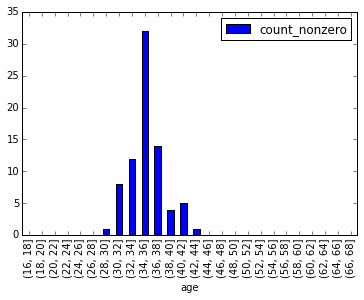

In [49]:
# Subsetting Brooklyn station data and creating histogram of the median ages
BK = stations_med_age[stations_med_age['boro']=='BK']
bins = np.arange(16, 69, 2)
BK.age.groupby(pd.cut(BK.age, bins)).agg([count_nonzero]).plot(kind='bar')

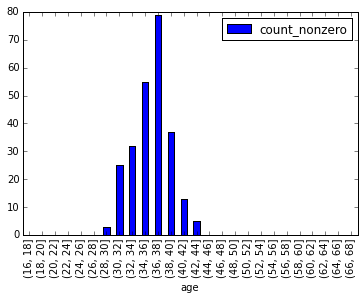

In [48]:
# Subsetting Manhattan station data and creating histogram of the median ages
MH = stations_med_age[stations_med_age['boro']=='MH']
MH.age.groupby(pd.cut(MH.age, bins)).agg([count_nonzero]).plot(kind='bar')

In [30]:
# Creating cummulative distributions for BK and MH
cMH = MH.age.groupby(pd.cut(MH.age, bins)).agg([count_nonzero]).cumsum()
cBK = BK.age.groupby(pd.cut(BK.age, bins)).agg([count_nonzero]).cumsum()

print np.abs(cBK / cBK.max()-cMH / cMH.max())

          count_nonzero
age                    
(16, 18]            NaN
(18, 20]            NaN
(20, 22]            NaN
(22, 24]            NaN
(24, 26]            NaN
(26, 28]            NaN
(28, 30]       0.000939
(30, 32]       0.004433
(32, 34]       0.031763
(34, 36]       0.226464
(36, 38]       0.091013
(38, 40]       0.005633
(40, 42]       0.007093
(42, 44]       0.000000
(44, 46]            NaN
(46, 48]            NaN
(48, 50]            NaN
(50, 52]            NaN
(52, 54]            NaN
(54, 56]            NaN
(56, 58]            NaN
(58, 60]            NaN
(60, 62]            NaN
(62, 64]            NaN
(64, 66]            NaN
(66, 68]            NaN


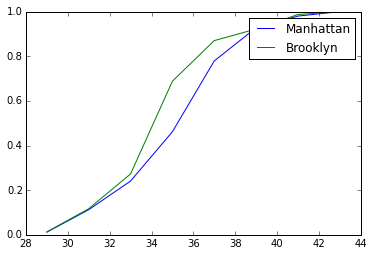

In [31]:
pl.plot(bins[:-1] + 1, cMH / cMH.max(), label = "Manhattan")
pl.plot(bins[:-1] + 1, cBK / cBK.max(), label = "Brooklyn")
pl.legend()

In [47]:
# Runnning a K-S test to compare the samples
ks = scipy.stats.ks_2samp(MH.age, BK.age)
print 'K-S Statistic:', round(ks[0],6)
print 'p value:', round(ks[1],6)

K-S Statistic: 0.226464
p value: 0.003877
